In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [7]:
# Loading the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [8]:
df.shape

(500000, 2)

In [9]:
df.columns

Index(['Review', 'Label'], dtype='object')

In [10]:
df.head()

,Review,Label
0,Not tasty and the texture was just nasty.,0
1,Very disappointing meal.,0
2,Very disappointing meal.,0
3,Wow... Loved this place.,1
4,Crust is not good.,0


# **Data Preprocessing**

In [11]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [13]:
corpus[0:10]

['tasti textur nasti',
 'disappoint meal',
 'disappoint meal',
 'wow love place',
 'crust good',
 'servic excel food delici',
 'highli recommend restaur',
 'everyth perfect',
 'expect better base review',
 'return place']

In [16]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:1000, 1].values

# **Model Building**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [20]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 100.0%
Precision score is: 1.0
Recall score is: 1.0


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[ 93,   0],
       [  0, 107]])

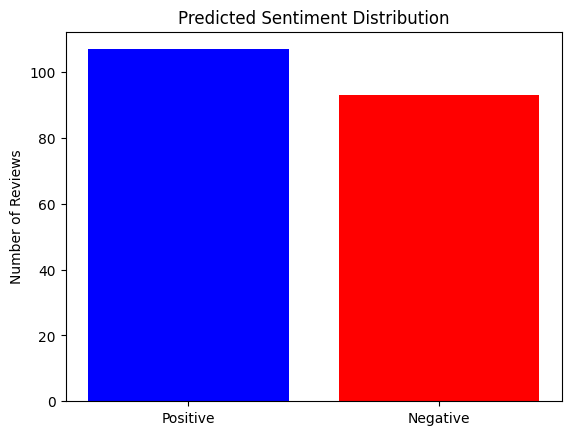

In [34]:
import matplotlib.pyplot as plt

# Count the number of positive and negative predictions
positive_count = sum(y_pred)
negative_count = len(y_pred) - positive_count

# Data for plotting
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

# Create bar chart
plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Predicted Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.show()

Text(95.72222222222221, 0.5, 'Actual values')

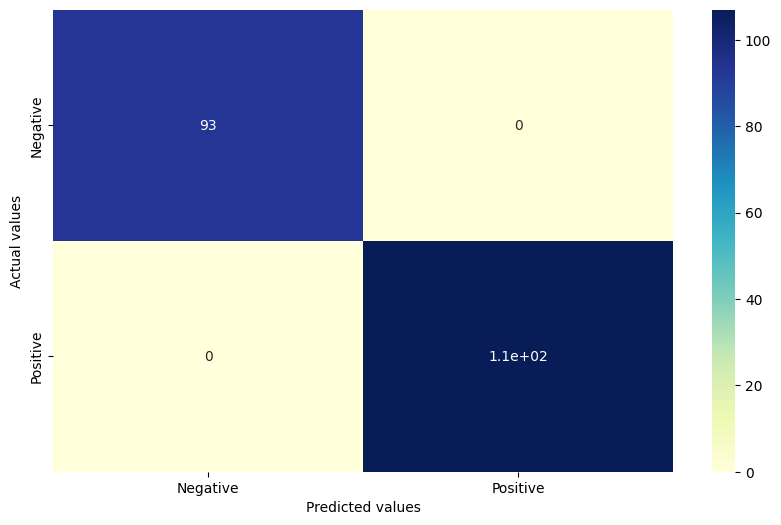

In [23]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [24]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 100.0%
Accuracy score for alpha=0.2 is: 100.0%
Accuracy score for alpha=0.3 is: 100.0%
Accuracy score for alpha=0.4 is: 100.0%
Accuracy score for alpha=0.5 is: 100.0%
Accuracy score for alpha=0.6 is: 100.0%
Accuracy score for alpha=0.7 is: 100.0%
Accuracy score for alpha=0.8 is: 100.0%
Accuracy score for alpha=0.9 is: 100.0%
Accuracy score for alpha=1.0 is: 100.0%
--------------------------------------------
The best accuracy is 100.0% with alpha value as 0.1


In [25]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

# **Predictions**

In [26]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [27]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [31]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [29]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
